In [1]:
"""
Trine ML Model to Classify / Identify the person using extracted face embeddings
"""

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pickle
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sn; sn.set_theme()
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


currentDir = os.getcwd()

# paths to embedding pickle file
embeddingPickle = os.path.join(currentDir, "output/FinalEmbeddings.pickle")
#embeddingPickle = os.path.join(currentDir, "output/FinalEmbeddingsStandard.pickle")

# path to save recognizer pickle file
recognizerPickle = os.path.join(currentDir, "output/FinalRecognizer.pickle")
#recognizerPickle = os.path.join(currentDir, "output/FinalRecognizerStandard.pickle")

# path to save labels pickle file
labelPickle = os.path.join(currentDir, "output/FinalLabel.pickle")
#labelPickle = os.path.join(currentDir, "output/FinalLabelStandard.pickle")

# loading embeddings pickle
data = pickle.loads(open(embeddingPickle, "rb").read())
data_table = pd.DataFrame(data)
data_table.to_csv("dataset.csv")
#data_table.to_csv("datasetStandard.csv")
data_table.drop(columns = ["paths" , "names"] , inplace = True)
#data_table.drop(columns = ["paths" , "imageIDs"] , inplace = True)
data_table.to_csv("datatable.csv")
#data_table.to_csv("datatableStandard.csv")


# encoding labels by names
label = LabelEncoder()
labels = label.fit_transform(data["names"])


# getting embeddings
Embeddings = np.array(data["embeddings"])



X_train, X_test, y_train, y_test = train_test_split(Embeddings, labels, test_size=0.40, random_state=42)

print("Total number of embeddings : ", Embeddings.shape)
print("Total number of labels :", len(labels))


Total number of embeddings :  (1102, 512)
Total number of labels : 1102


In [2]:
recognizer = KNeighborsClassifier(n_neighbors=5)
recognizer.fit(X_train, y_train)

print(X_test.shape)
prediction = recognizer.predict(X_test)

acc = accuracy_score(y_test, prediction)

(441, 512)


In [3]:
main_dir = "/dataset"
prev_person = 0

TP = [0,0,0,0,0,0,0,0,0,0,0,0,0]
FP = [0,0,0,0,0,0,0,0,0,0,0,0,0]
FN = [0,0,0,0,0,0,0,0,0,0,0,0,0]
pred = []


for i in range(0, (len(labels))):
    pred.append(recognizer.predict([Embeddings[i]])[0])
    

for i in range (0, 13):
    for j in range(0,len(labels)):
        
        if i == labels[j] and i == pred[j]:
            TP[i] += 1
            
        elif i == labels[j] and i != pred[j]:
            FN[i] += 1
            
        elif i != labels[j] and i == pred[j]:
            FP[i] += 1
                
print("TP", TP)
print("FN", FN)
print("FP", FP)
                
            
    

TP [95, 56, 96, 80, 26, 97, 100, 81, 97, 88, 81, 94, 97]
FN [1, 3, 0, 1, 3, 0, 0, 1, 0, 0, 1, 3, 1]
FP [1, 0, 0, 2, 1, 2, 0, 1, 1, 3, 1, 1, 1]


In [4]:
precision = [0,0,0,0,0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0,0,0,0,0]
f1 = [0,0,0,0,0,0,0,0,0,0,0,0,0]


for i in range(0,13):
    precision[i] = TP[i]/(TP[i]+FP[i])
    recall[i] = TP[i]/(TP[i]+FN[i])
    f1[i] = 2*(recall[i] * precision[i]) / (recall[i] + precision[i])
    
    
    
print(precision)
print(recall)
print(f1)

[0.9895833333333334, 1.0, 1.0, 0.975609756097561, 0.9629629629629629, 0.9797979797979798, 1.0, 0.9878048780487805, 0.9897959183673469, 0.967032967032967, 0.9878048780487805, 0.9894736842105263, 0.9897959183673469]
[0.9895833333333334, 0.9491525423728814, 1.0, 0.9876543209876543, 0.896551724137931, 1.0, 1.0, 0.9878048780487805, 1.0, 1.0, 0.9878048780487805, 0.9690721649484536, 0.9897959183673469]
[0.9895833333333334, 0.9739130434782608, 1.0, 0.9815950920245398, 0.9285714285714286, 0.989795918367347, 1.0, 0.9878048780487805, 0.9948717948717948, 0.9832402234636871, 0.9878048780487805, 0.9791666666666666, 0.9897959183673469]


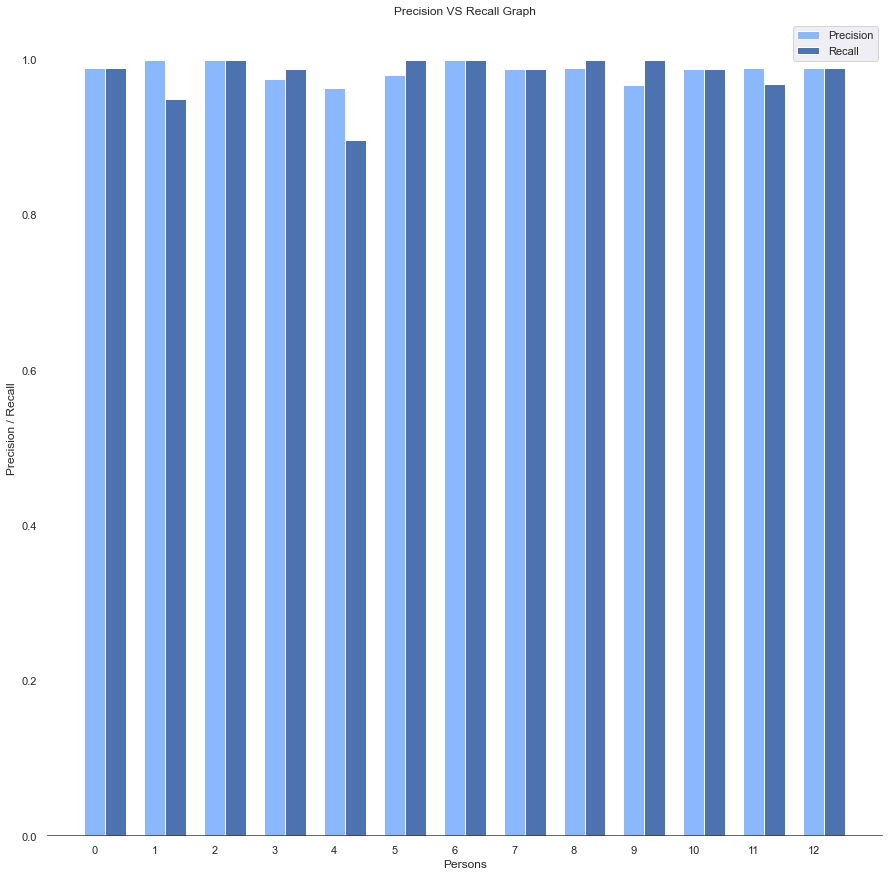

In [11]:
import numpy as np
import matplotlib.pyplot as plt



# create plot
fig, ax = plt.subplots(figsize=(15,15))
bar_width = 0.35
X = np.arange(13)

p1 = plt.bar(X, precision, bar_width, color=(.54,.72,1,1),label='Precision')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, recall, bar_width, color='b', label='Recall')
ax.set_facecolor("White")
ax.axhline(y=0, color='k')
ax.set_xticklabels(X)
ax.set_xticks(np.arange(len(X)))

plt.xlabel('Persons')
plt.ylabel('Precision / Recall')
plt.title('Precision VS Recall Graph')
plt.legend()

plt.show()

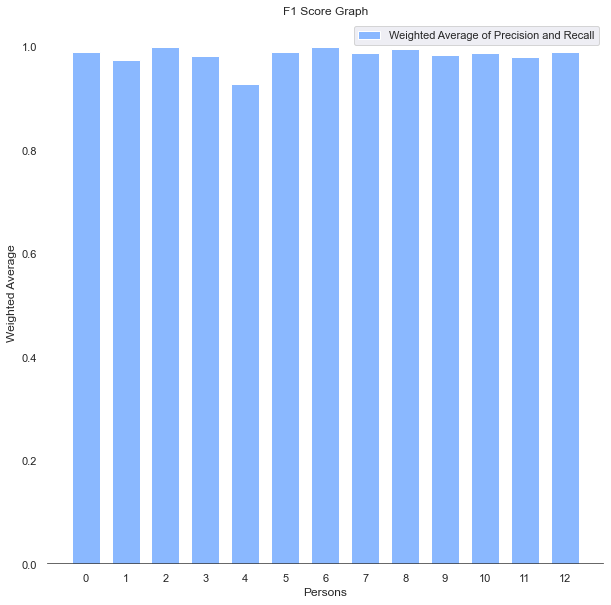

In [10]:
import numpy as np
import matplotlib.pyplot as plt



# create plot
fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.7
X = np.arange(13)

p1 = plt.bar(X, f1, bar_width, color=(.54,.72,1,1),label='Weighted Average of Precision and Recall')


ax.set_xticklabels(X)
ax.set_xticks(np.arange(len(X)))
ax.set_facecolor("White")
ax.axhline(y=0, color='k')

plt.xlabel('Persons')
plt.ylabel('Weighted Average')
plt.title('F1 Score Graph')
plt.legend()

plt.show()

In [87]:
C = confusion_matrix(labels, pred)
Conf = (C / C.astype(np.float).sum(axis=1, keepdims=True))*100

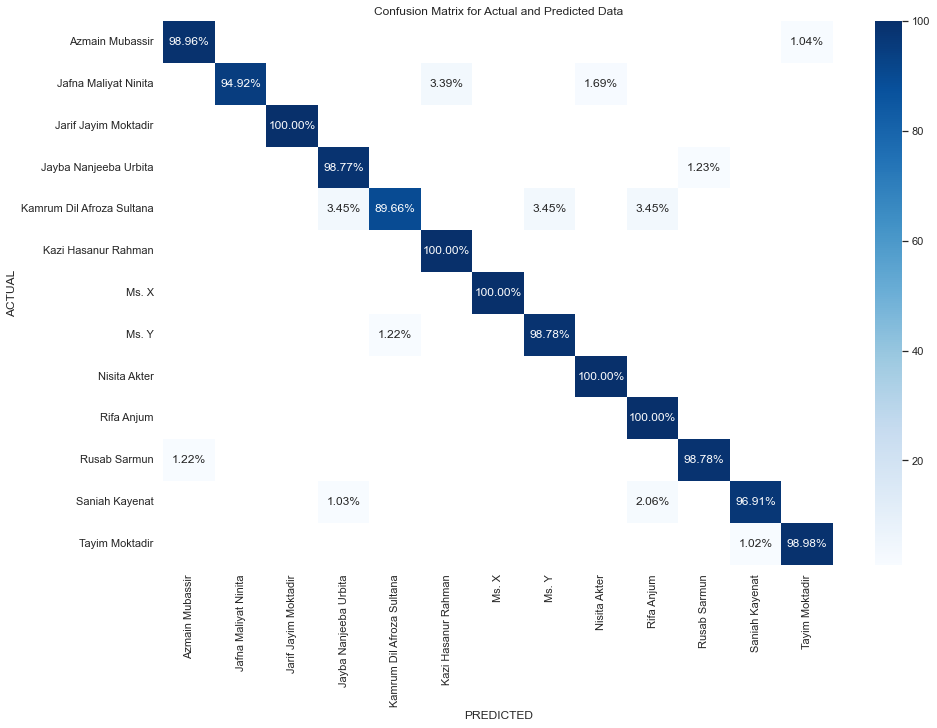

In [79]:
array = Conf

df_cm = pd.DataFrame(array, ["Azmain Mubassir", "Jafna Maliyat Ninita", "Jarif Jayim Moktadir" , "Jayba Nanjeeba Urbita" , "Kamrum Dil Afroza Sultana" , "Kazi Hasanur Rahman" , "Ms. X" , "Ms. Y" , "Nisita Akter" , "Rifa Anjum" , "Rusab Sarmun" , "Saniah Kayenat" ,"Tayim Moktadir"], ["Azmain Mubassir", "Jafna Maliyat Ninita", "Jarif Jayim Moktadir" , "Jayba Nanjeeba Urbita" , "Kamrum Dil Afroza Sultana" , "Kazi Hasanur Rahman" , "Ms. X" , "Ms. Y" , "Nisita Akter" , "Rifa Anjum" , "Rusab Sarmun" , "Saniah Kayenat" ,"Tayim Moktadir"])
plt.figure(figsize=(15,10))

sn.set(font_scale=1.3) # for label size
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
HM = sn.heatmap(df_cm , mask = df_cm <1, cbar = "False", annot=True, cmap="Blues", fmt='.2f' ) # font size

for t in HM.texts: 
    t.set_text(t.get_text() + "%")
    

    
plt.xlabel("PREDICTED") 
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for Actual and Predicted Data')
plt.show()